In [3]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [2]:
def lin(a, b, x):
    return a * x + b

In [4]:
a=3.
b=8.

In [7]:
n=30
x=random(n)
y=lin(a, b, x)

In [8]:
x

array([ 0.8064,  0.117 ,  0.8045,  0.1765,  0.1355,  0.6641,  0.1327,  0.5668,  0.4552,  0.9613,
        0.1951,  0.5283,  0.259 ,  0.2212,  0.8881,  0.5799,  0.5394,  0.9195,  0.89  ,  0.2534,
        0.6046,  0.3073,  0.2716,  0.1231,  0.1728,  0.7493,  0.5833,  0.4635,  0.8217,  0.3922])

In [9]:
y

array([ 10.4193,   8.351 ,  10.4134,   8.5296,   8.4064,   9.9924,   8.398 ,   9.7004,   9.3657,
        10.8838,   8.5852,   9.5849,   8.7771,   8.6636,  10.6642,   9.7396,   9.6181,  10.7586,
        10.6701,   8.7602,   9.8137,   8.922 ,   8.8149,   8.3692,   8.5183,  10.2478,   9.7499,
         9.3905,  10.4652,   9.1765])

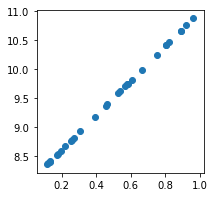

In [14]:
plt.scatter(x, y)

In [24]:
def sse(y, y_h): return sum((y - y_h)**2)
def loss(y, a, b, x): return sse(y, lin(a, b, x))
def avg_loss(y, a, b, x): return math.sqrt(loss(y, a, b, x)/n)

In [66]:
a_guess=1.
b_guess=1.
avg_loss(y, a_guess, b_guess, x)

7.9911

In [67]:
lr = 0.01

In [68]:
# sse = y - (ax + b)

def update():
    global a_guess, b_guess
    y_h = lin(a_guess, b_guess, x)
    dydb = -2 * (y - y_h)
    dyda = -2 * (y - y_h) * x
    a_guess = a_guess - lr * np.mean(dyda)
    b_guess = b_guess - lr * np.mean(dydb)
    

In [69]:
from sympy import *
d_x = Symbol('x')
d_a = Symbol('a')
d_b = Symbol('b')
d_y = Symbol('y')
d_y_h = (d_y - (d_a * d_x + d_b)) ** 2
print(d_y_h.diff(d_a))
print(d_y_h.diff(d_b))

-2*x*(-a*x - b + y)
2*a*x + 2*b - 2*y


In [75]:
update()
print(a_guess)
print(b_guess)
print(avg_loss(y, a_guess, b_guess, x))

1.45333770659
1.89904108406
6.86592775261


In [77]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): update()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani


RuntimeError: No MovieWriters available!